In [53]:
%matplotlib inline
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics


# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the `tutorial section of the user manual <introduction>`.




In [2]:
# The digits dataset
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

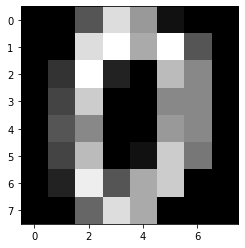

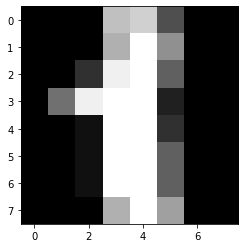

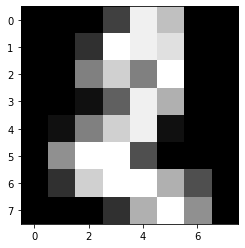

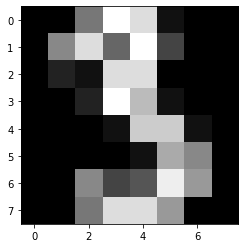

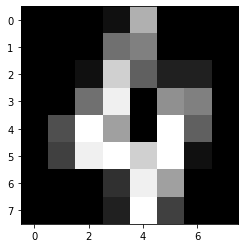

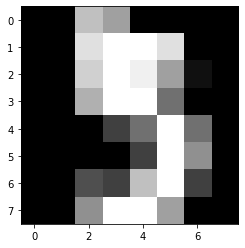

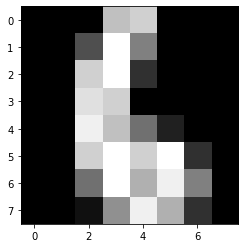

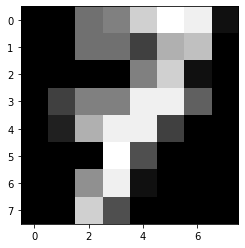

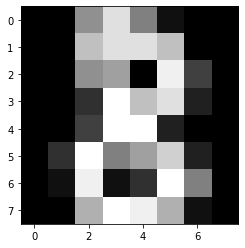

In [7]:
%matplotlib inline
for i in range(9):
    plt.gray()
    plt.imshow(digits.images[i])
    plt.show()

In [24]:
X = digits.data
Y = digits.target

In [25]:
X.shape

(1797, 64)

In [26]:
Y.shape

(1797,)

In [46]:
from sklearn.model_selection import train_test_split,validation_curve
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [40]:
x_train.shape

(1257, 64)

In [41]:
y_train.shape

(1257,)

In [42]:
y_test.shape

(540,)

In [43]:
x_test.shape

(540, 64)

**Validation curve.**

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

In [58]:
param_range=np.logspace(-4, 1, 6)

In [61]:
train_scores, valid_scores = validation_curve(svm.SVC(kernel='rbf', C=1, random_state=0), x_train,y_train,
                                                  param_name="gamma",
                                                  scoring="accuracy",
                                                  param_range=param_range,
                                                  verbose=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] gamma=0.0001 ....................................................
[CV] .... gamma=0.0001, score=(train=0.974, test=0.960), total=   0.1s
[CV] gamma=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... gamma=0.001, score=(train=1.000, test=0.980), total=   0.2s
[CV] gamma=0.01 ......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ...... gamma=0.01, score=(train=1.000, test=0.687), total=   0.5s
[CV] gamma=0.1 .......................................................
[CV] ....... gamma=0.1, score=(train=1.000, test=0.119), total=   0.5s
[CV] gamma=1.0 .......................................................
[CV] ....... gamma=1.0, score=(train=1.000, test=0.107), total=   0.6s
[CV] gamma=10.0 ......................................................
[CV] ...... gamma=10.0, score=(train=1.000, test=0.107), total=   0.7s
[CV] gamma=0.0001 ....................................................
[CV] .... gamma=0.0001, score=(train=0.972, test=0.964), total=   0.2s
[CV] gamma=0.001 .....................................................
[CV] ..... gamma=0.001, score=(train=0.998, test=0.980), total=   0.2s
[CV] gamma=0.01 ......................................................
[CV] ...... gamma=0.01, score=(train=1.000, test=0.766), total=   0.5s
[CV] gamma=0.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   19.4s finished


### Plotting Validation Curves
In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. For very low values of gamma, you can see that both the training score and the validation score are low. This is called underfitting. Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. If gamma is too high, the classifier will overfit, which means that the training score is good but the `validation score is poor`.

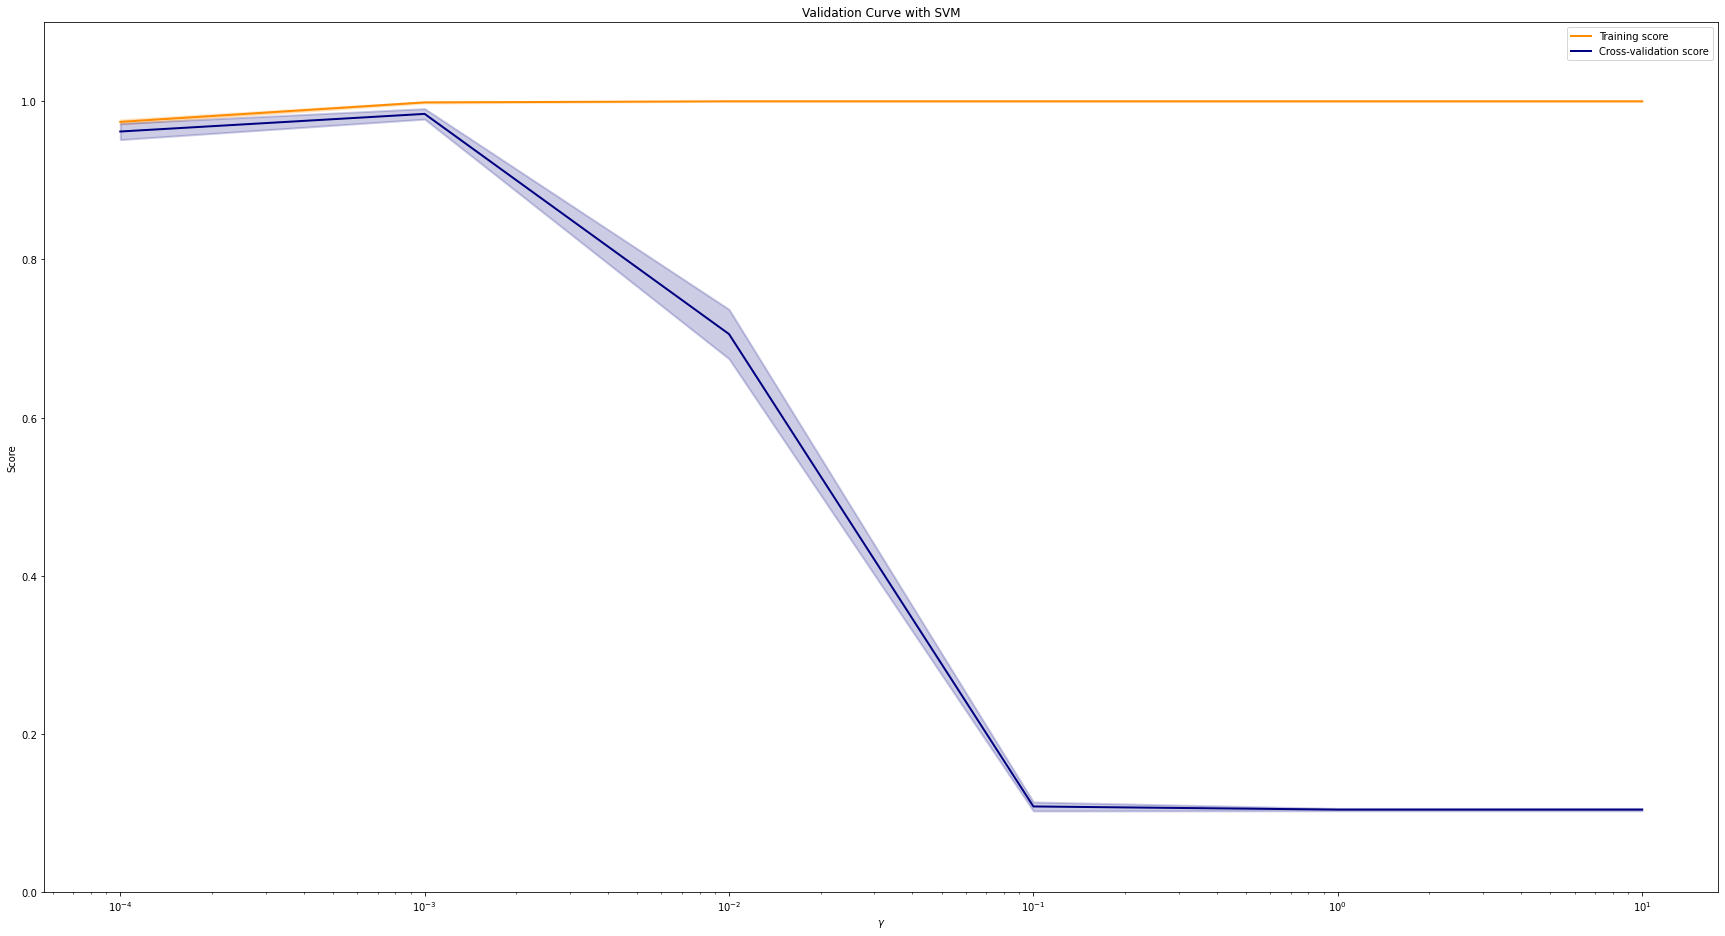

In [63]:
plt.figure(figsize=(30,16))
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()